In [5]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
# import shapely as shap
import plotly as py
import plotly.graph_objs as go
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Online Shoppers Purchasing Intention

In [2]:
data=pd.read_csv("online_shoppers_intention.csv")

In [3]:
data.head()

Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  Revenue
0               0                      0.0              0                     0.0               1                 0.000000         0.20       0.20         0.0         0.0   Feb                 1        1       1            1  Returning_Visitor    False    False
1               0                      0.0              0                     0.0               2                64.000000         0.00       0.10         0.0         0.0   Feb                 2        2       1            2  Returning_Visitor    False    False
2               0                      0.0              0                     0.0               1                 0.000000         0.20       0.20         0.0         0.0   Feb                 4        1       9            3  Returning_Visitor    False    False
3               0                      0.0              0                     0.0               2                 2.666667         0.05       0.14         0.0         0.0   Feb                 3        2       2            4  Returning_Visitor    False    False
4               0                      0.0              0                     0.0              10               627.500000         0.02       0.05         0.0         0.0   Feb                 3        3       1            4  Returning_Visitor     True    False

In [4]:
data.describe()

Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration   BounceRates     ExitRates    PageValues    SpecialDay  OperatingSystems       Browser        Region   TrafficType
count    12330.000000             12330.000000   12330.000000            12330.000000    12330.000000             12330.000000  12330.000000  12330.000000  12330.000000  12330.000000      12330.000000  12330.000000  12330.000000  12330.000000
mean         2.315166                80.818611       0.503569               34.472398       31.731468              1194.746220      0.022191      0.043073      5.889258      0.061427          2.124006      2.357097      3.147364      4.069586
std          3.321784               176.779107       1.270156              140.749294       44.475503              1913.669288      0.048488      0.048597     18.568437      0.198917          0.911325      1.717277      2.401591      4.025169
min          0.000000                 0.000000       0.000000                0.000000        0.000000                 0.000000      0.000000      0.000000      0.000000      0.000000          1.000000      1.000000      1.000000      1.000000
25%          0.000000                 0.000000       0.000000                0.000000        7.000000               184.137500      0.000000      0.014286      0.000000      0.000000          2.000000      2.000000      1.000000      2.000000
50%          1.000000                 7.500000       0.000000                0.000000       18.000000               598.936905      0.003112      0.025156      0.000000      0.000000          2.000000      2.000000      3.000000      2.000000
75%          4.000000                93.256250       0.000000                0.000000       38.000000              1464.157213      0.016813      0.050000      0.000000      0.000000          3.000000      2.000000      4.000000      4.000000
max         27.000000              3398.750000      24.000000             2549.375000      705.000000             63973.522230      0.200000      0.200000    361.763742      1.000000          8.000000     13.000000      9.000000     20.000000

In [5]:
data.shape

(12330, 18)

In [6]:
data.corr()

Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser    Region  TrafficType   Weekend   Revenue
Administrative                 1.000000                 0.601583       0.376850                0.255848        0.431119                 0.373939    -0.223563  -0.316483    0.098990   -0.094778         -0.006347 -0.025035 -0.005487    -0.033561  0.026417  0.138917
Administrative_Duration        0.601583                 1.000000       0.302710                0.238031        0.289087                 0.355422    -0.144170  -0.205798    0.067608   -0.073304         -0.007343 -0.015392 -0.005561    -0.014376  0.014990  0.093587
Informational                  0.376850                 0.302710       1.000000                0.618955        0.374164                 0.387505    -0.116114  -0.163666    0.048632   -0.048219         -0.009527 -0.038235 -0.029169    -0.034491  0.035785  0.095200
Informational_Duration         0.255848                 0.238031       0.618955                1.000000        0.280046                 0.347364    -0.074067  -0.105276    0.030861   -0.030577         -0.009579 -0.019285 -0.027144    -0.024675  0.024078  0.070345
ProductRelated                 0.431119                 0.289087       0.374164                0.280046        1.000000                 0.860927    -0.204578  -0.292526    0.056282   -0.023958          0.004290 -0.013146 -0.038122    -0.043064  0.016092  0.158538
ProductRelated_Duration        0.373939                 0.355422       0.387505                0.347364        0.860927                 1.000000    -0.184541  -0.251984    0.052823   -0.036380          0.002976 -0.007380 -0.033091    -0.036377  0.007311  0.152373
BounceRates                   -0.223563                -0.144170      -0.116114               -0.074067       -0.204578                -0.184541     1.000000   0.913004   -0.119386    0.072702          0.023823 -0.015772 -0.006485     0.078286 -0.046514 -0.150673
ExitRates                     -0.316483                -0.205798      -0.163666               -0.105276       -0.292526                -0.251984     0.913004   1.000000   -0.174498    0.102242          0.014567 -0.004442 -0.008907     0.078616 -0.062587 -0.207071
PageValues                     0.098990                 0.067608       0.048632                0.030861        0.056282                 0.052823    -0.119386  -0.174498    1.000000   -0.063541          0.018508  0.045592  0.011315     0.012532  0.012002  0.492569
SpecialDay                    -0.094778                -0.073304      -0.048219               -0.030577       -0.023958                -0.036380     0.072702   0.102242   -0.063541    1.000000          0.012652  0.003499 -0.016098     0.052301 -0.016767 -0.082305
OperatingSystems              -0.006347                -0.007343      -0.009527               -0.009579        0.004290                 0.002976     0.023823   0.014567    0.018508    0.012652          1.000000  0.223013  0.076775     0.189154  0.000284 -0.014668
Browser                       -0.025035                -0.015392      -0.038235               -0.019285       -0.013146                -0.007380    -0.015772  -0.004442    0.045592    0.003499          0.223013  1.000000  0.097393     0.111938 -0.040261  0.023984
Region                        -0.005487                -0.005561      -0.029169               -0.027144       -0.038122                -0.033091    -0.006485  -0.008907    0.011315   -0.016098          0.076775  0.097393  1.000000     0.047520 -0.000691 -0.011595
TrafficType                   -0.033561                -0.014376      -0.034491               -0.024675       -0.043064                -0.036377     0.078286   0.078616    0.012532    0.052301          0.189154  0.111938  0.047520     1.000000 -0.002221 -0.005113
Weekend                        0.026417                 0.014990 

## EDA

### checking the Distribution of customers on Revenue

Text(0, 0.5, 'count')

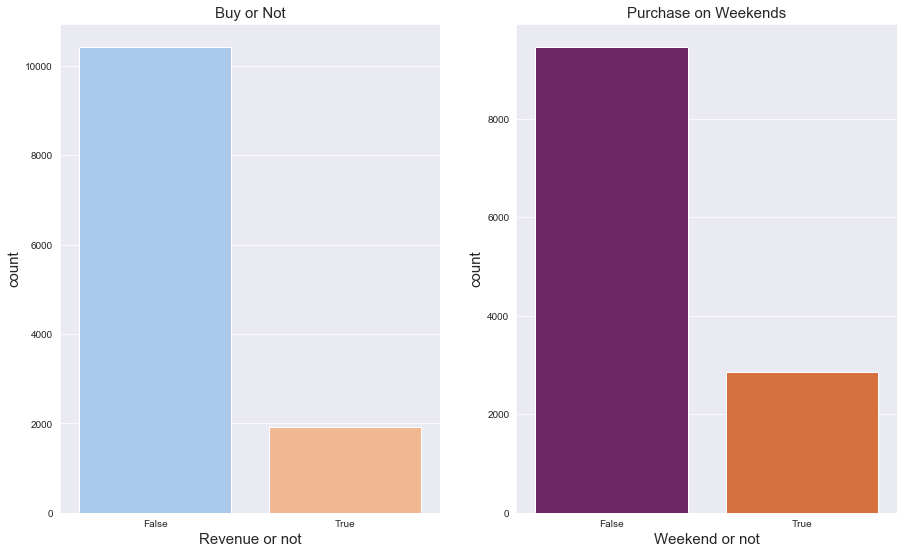

In [6]:
plt.subplot(1, 2, 1)
sns.countplot(data.Revenue, palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Weekend, palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)



### checking the Distribution of customers based on type of customer and browser used

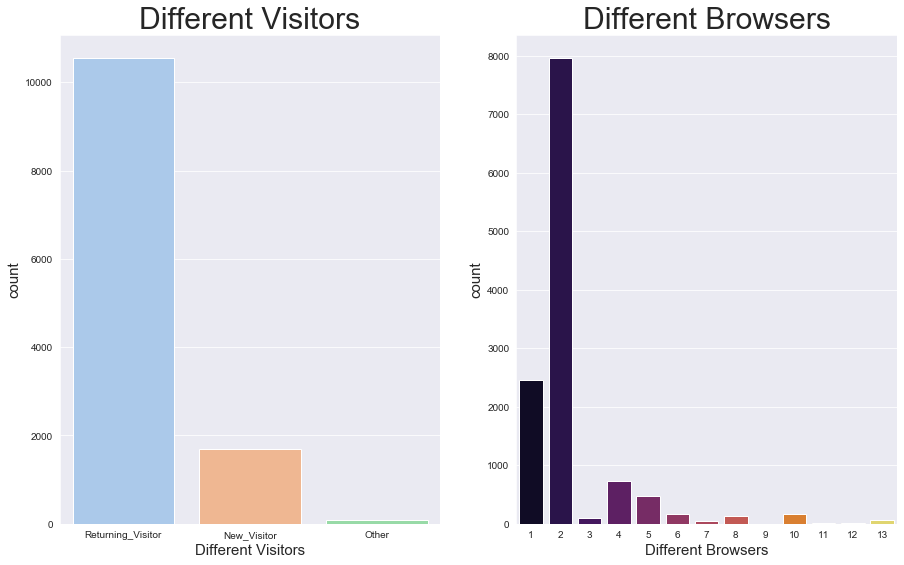

In [7]:
plt.subplot(1, 2, 1)
sns.countplot(data.VisitorType, palette = 'pastel')
plt.title('Different Visitors', fontsize = 30)
plt.xlabel('Different Visitors', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Browser, palette = 'inferno')
plt.title('Different Browsers', fontsize = 30)
plt.xlabel('Different Browsers', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

### visualizing the distribution of customers around the Region and Traffic Type

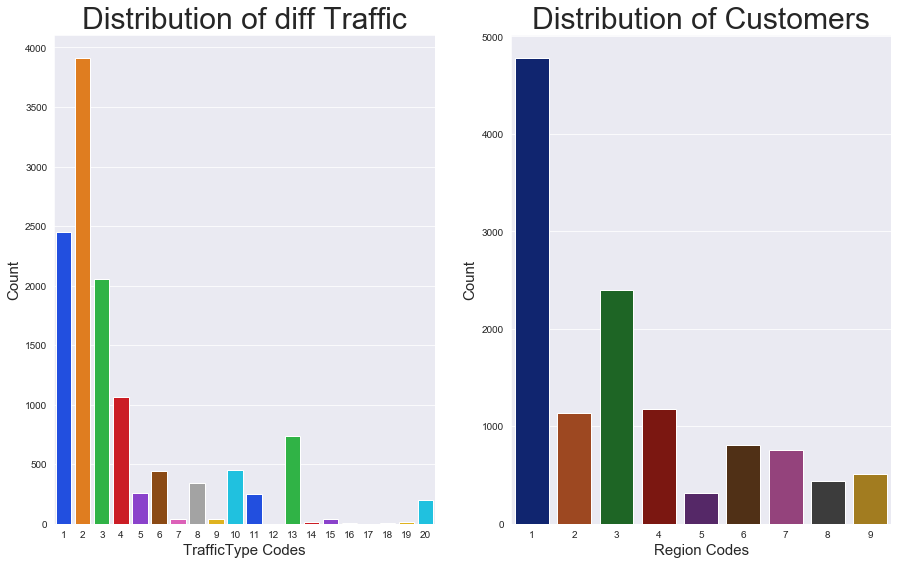

In [366]:
plt.subplot(1, 2, 1)
sns.countplot(data.TrafficType,  palette = 'bright')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Region, palette = 'dark')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### plotting a pie chart for different number of OSes users have and Month

In [367]:
data.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [368]:
data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [369]:
size = [6601, 2585, 2555, 478, 111]#79+19+7+6=111 labeled as others
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"

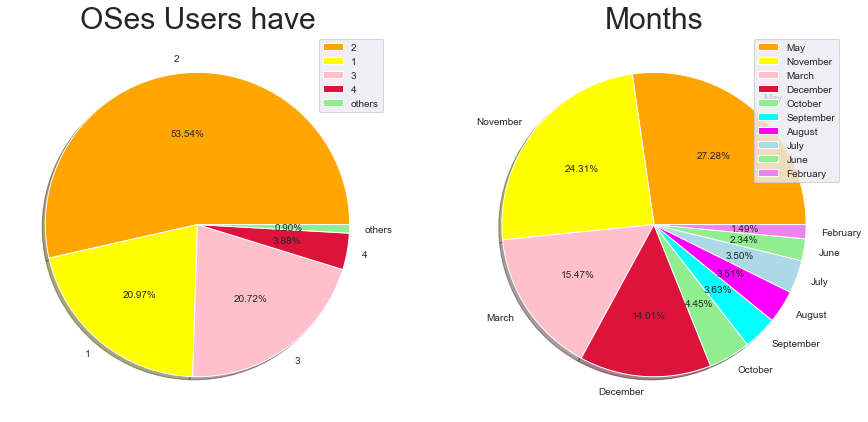

In [370]:
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels,shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
plt.axis('off')
plt.legend()
# counts of months
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"


plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Months', fontsize = 30)
plt.axis('off')
plt.legend()

plt.show()

### Analysis against Revenue(Target Variable)

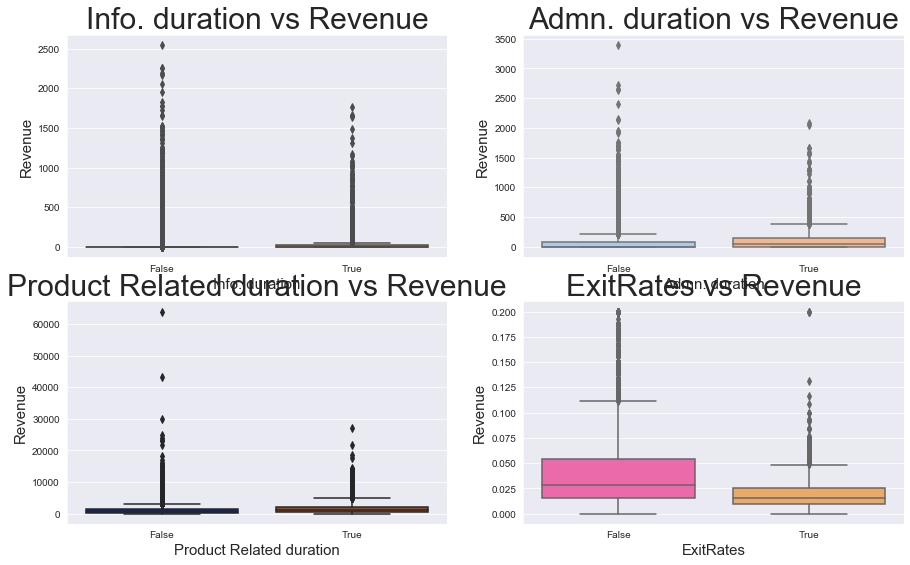

In [371]:
# product related duration vs revenue
plt.subplot(2, 2, 1)
sns.boxplot(data.Revenue, data.Informational_Duration, palette = 'bright')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxplot(data.Revenue, data.Administrative_Duration, palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxplot(data.Revenue, data.ProductRelated_Duration, palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxplot(data.Revenue, data.ExitRates, palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()


Text(0, 0.5, 'Revenue')

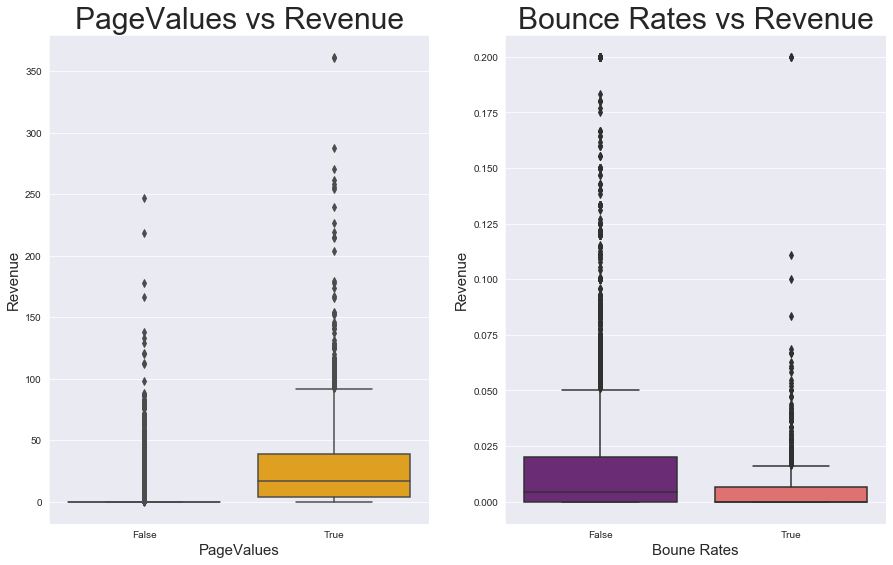

In [372]:
# page values vs revenue


plt.subplot(1, 2, 1)
sns.boxplot(data.Revenue, data.PageValues, palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.boxplot(data.Revenue, data.BounceRates, palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

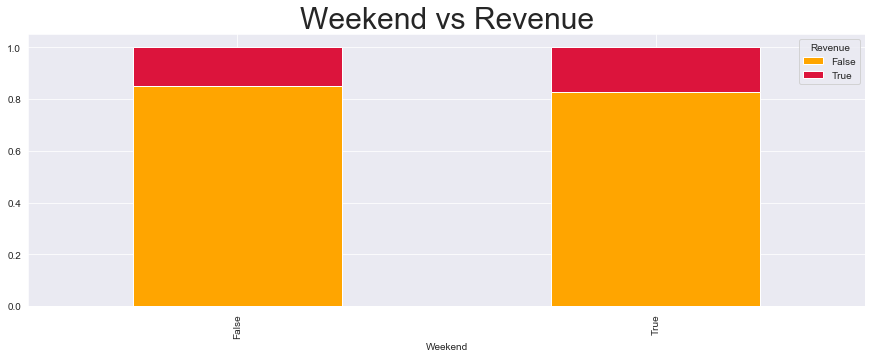

In [373]:
# weekend vs Revenue

df = pd.crosstab(data.Weekend, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

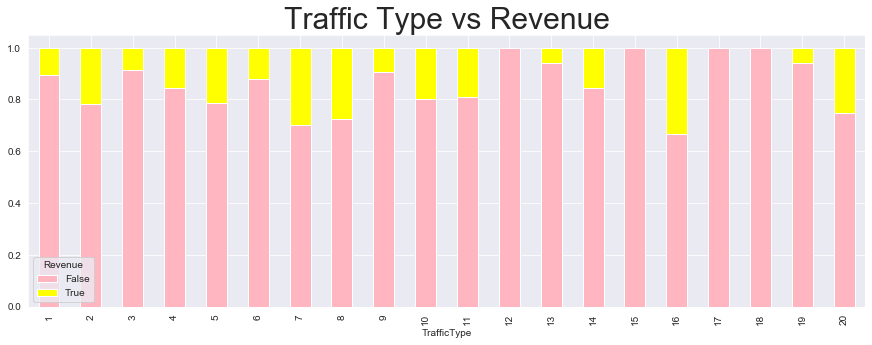

In [374]:
# Traffic Type vs Revenue
df = pd.crosstab(data.TrafficType, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

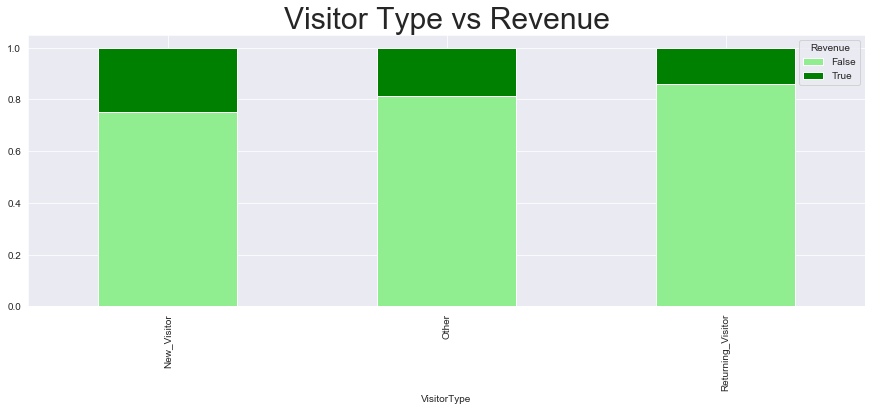

In [375]:
# visitor type vs revenue
df = pd.crosstab(data.VisitorType, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

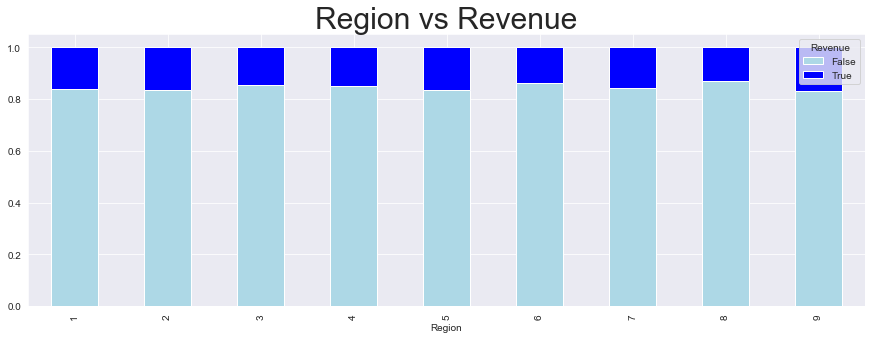

In [376]:
# region vs Revenue
df = pd.crosstab(data.Region, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

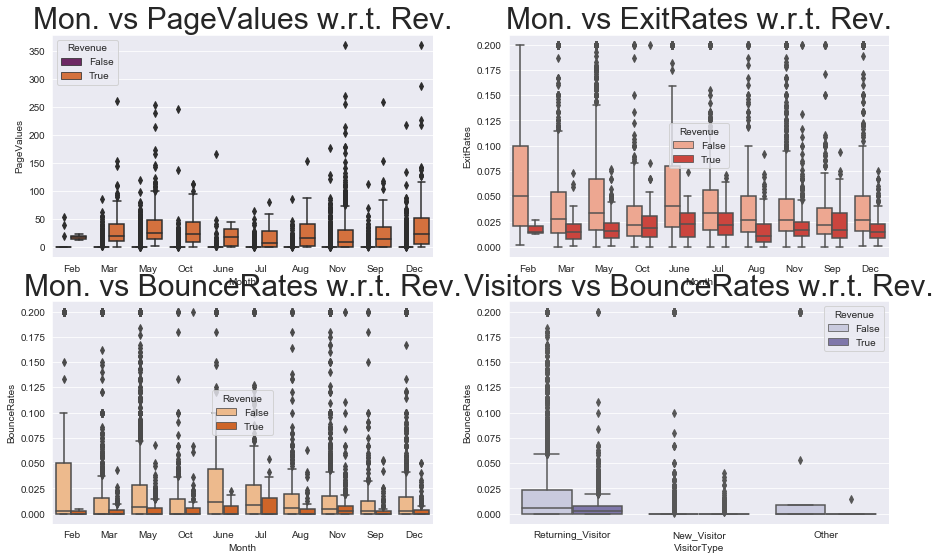

In [377]:
# month vs pagevalues wrt revenue

plt.subplot(2, 2, 1)
sns.boxplot(x = data.Month, y = data.PageValues, hue = data.Revenue, palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.Month, y = data.ExitRates, hue = data.Revenue, palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.Month, y = data.BounceRates, hue = data.Revenue, palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.VisitorType, y = data.BounceRates, hue = data.Revenue, palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

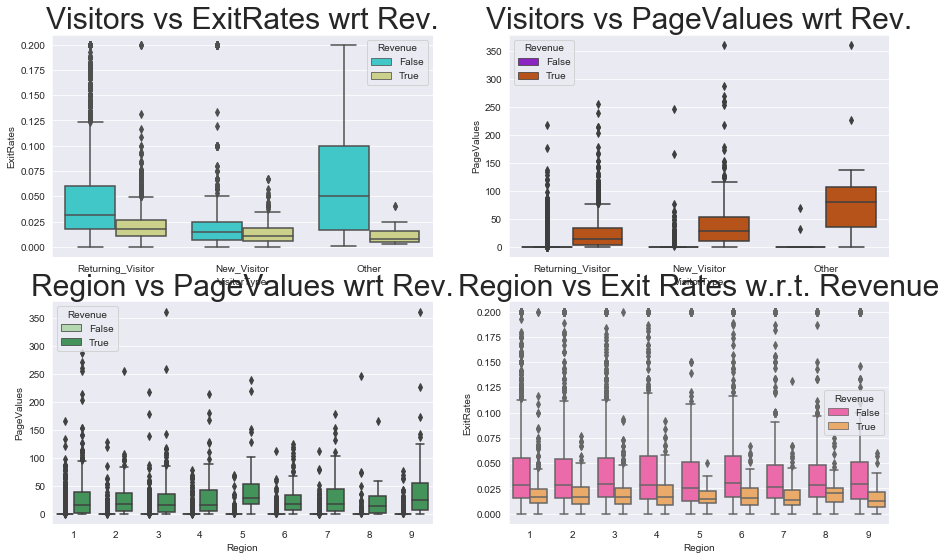

In [378]:

plt.subplot(2, 2, 1)
sns.boxplot(x = data.VisitorType, y = data.ExitRates, hue = data.Revenue, palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.VisitorType, y = data.PageValues, hue = data.Revenue, palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)
# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.Region, y = data.PageValues, hue = data.Revenue, palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.Region, y = data.ExitRates, hue = data.Revenue, palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

## Clustering Analysis

### Trying to learn the user characteristics of in terms of time spent on the Website

let's cluster Administrative duration and Bounce Rate to different types of clusters in the dataset.

In [379]:
x = data.iloc[:, [1, 6]]
x.shape

(12330, 2)

In [380]:
from sklearn.cluster import KMeans

In [381]:
clr_rng=range(1,15)
clr_err=[]
for i in clr_rng:
    model=KMeans(i)
    model.fit(x)
    clr_err.append(model.inertia_)

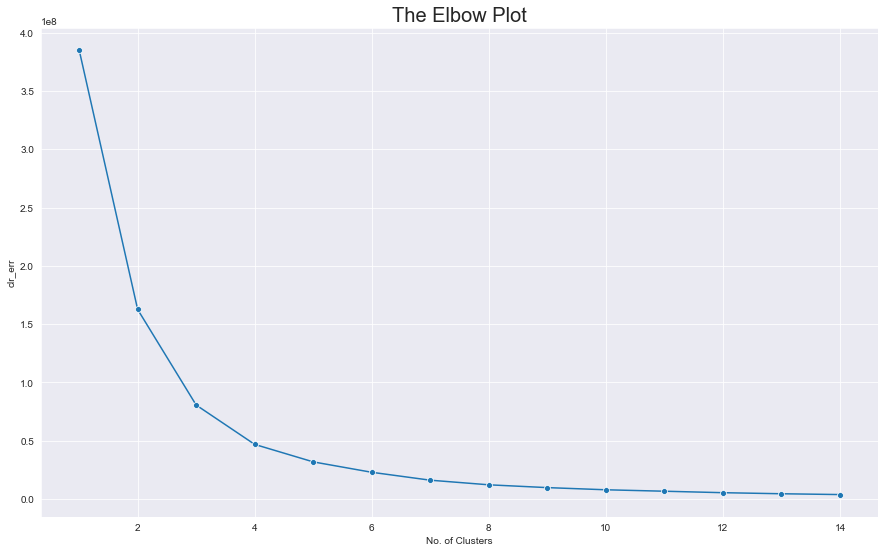

In [382]:
sns.lineplot(range(1,15),clr_err,marker="o")
plt.title('The Elbow Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('clr_err')
plt.show()

According to this plot, the maximum bend is at fourth index, that is the number of Optimal no. of Clusters for Adminstrative Duration and BounceRates is four. Let's go to the next step, i.e., Plotting the Clusters.

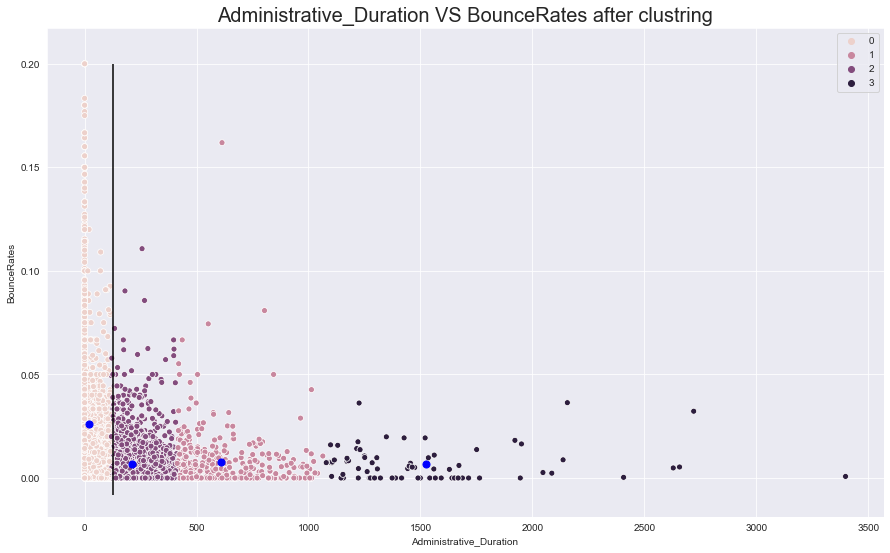

In [383]:
km = KMeans(n_clusters = 4,random_state = 0)
y_means1 = km.fit_predict(x)
sns.scatterplot(x.Administrative_Duration,x.BounceRates,hue=y_means1)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Administrative_Duration VS BounceRates after clustring', fontsize = 20)
plt.xlabel('Administrative_Duration')
plt.ylabel('BounceRates')
plt.vlines(x=125,ymin=-0.008,ymax=0.20)
plt.show()

In [384]:
o0=y_means1[y_means1==0]# Revenue which are Flase, Denoted by Vline

In [385]:
len(o0)

9774

let's cluster Page Values and Exit Rate to different types of clusters in the dataset

In [386]:
x = data.iloc[:, [7, 8]]

In [387]:
x.columns

Index(['ExitRates', 'PageValues'], dtype='object')

In [388]:
clr_rng=range(1,15)
clr_err=[]
for i in clr_rng:
    model=KMeans(i)
    model.fit(x)
    clr_err.append(model.inertia_)

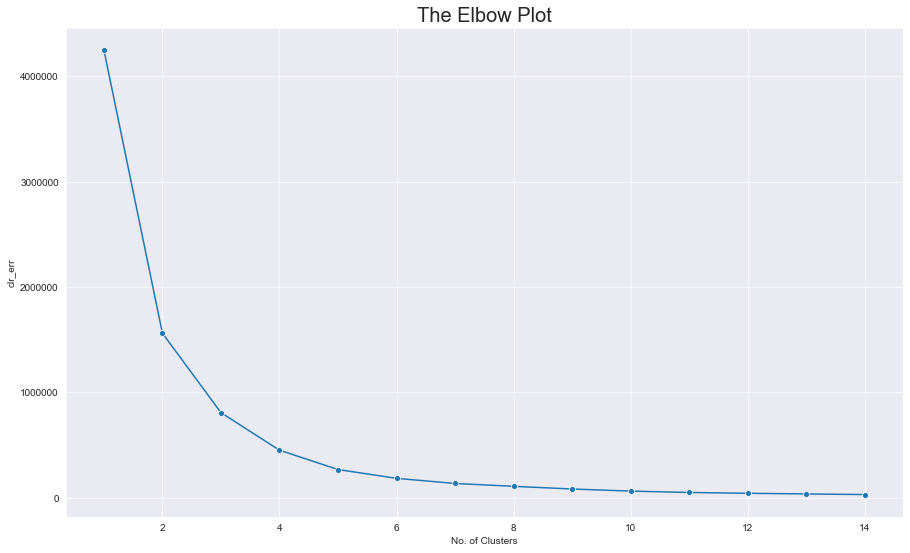

In [389]:
sns.lineplot(range(1,15),clr_err,marker="o")
plt.title('The Elbow Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('clr_err')
plt.show()

According to this plot, the maximum bend is at fifth index, that is the number of Optimal no. of Clusters for ExitRates and PageValues is five. Let's go to the next step, i.e., Plotting the Clusters.

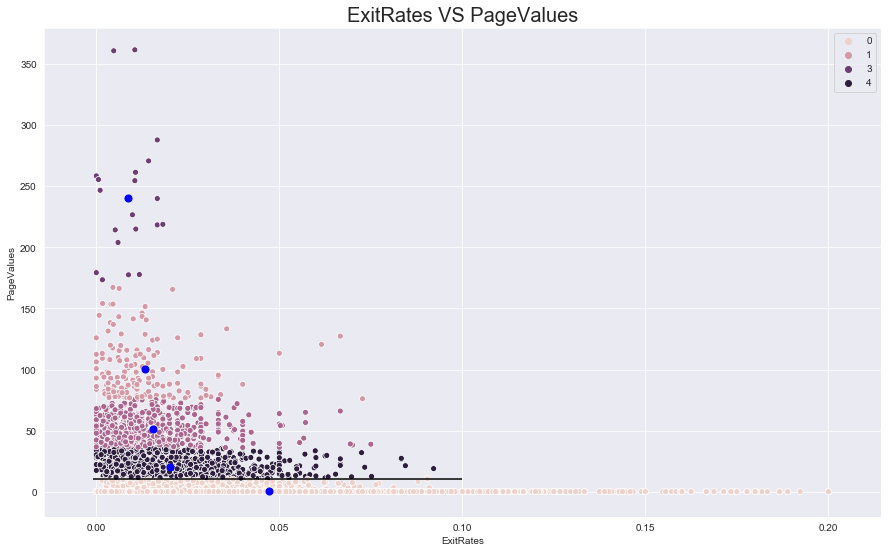

In [390]:
km = KMeans(n_clusters = 5,random_state = 0)
y_means2 = km.fit_predict(x)
sns.scatterplot(x.ExitRates,x.PageValues,hue=y_means2)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('ExitRates VS PageValues', fontsize = 20)
plt.xlabel('ExitRates')
plt.ylabel('PageValues')
plt.hlines(y=10,xmin=-0.001,xmax=0.10)
plt.show()

In [391]:
o0=y_means2[y_means2==0]# Revenue which are Flase, Denoted by Vline

In [392]:
len(o0)# better clustring

10569

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [395]:
objectdata=["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]

In [396]:
for i in data.columns:
    if i in objectdata:
        data[i]=data[i].astype(object)

Changing all features to correct data type

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12330 non-null object
Region                     12330 non-null object
TrafficType                12330 non-null object
VisitorType                12330 non-null object
Weekend                    12330 non-null object
Revenue                    12330 non-null bool
dtypes:

#### Checking all features and there distributions

Text(0.5, 1.0, 'Informational_Duration')

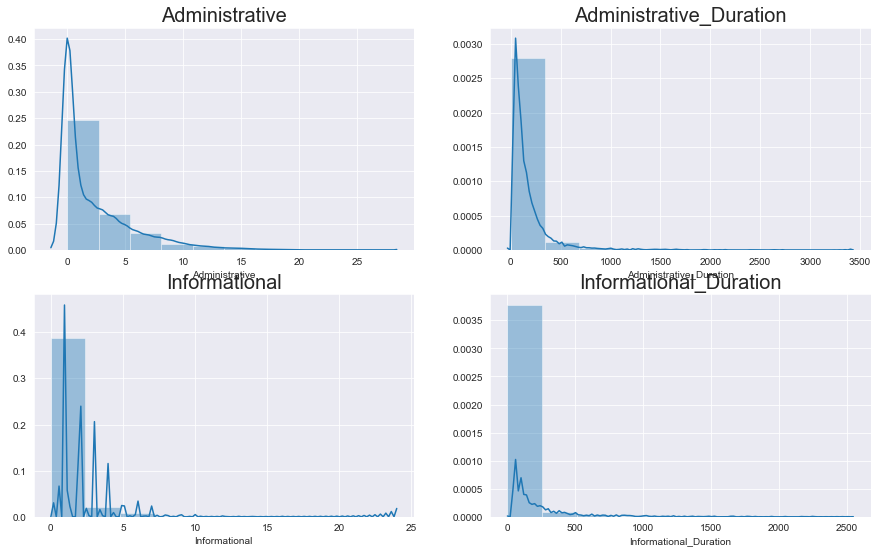

In [408]:
plt.subplot(2,2,1)
sns.distplot(data.Administrative,bins=10)
plt.title('Administrative', fontsize = 20)
plt.subplot(2,2,2)
sns.distplot(data.Administrative_Duration,bins=10)
plt.title('Administrative_Duration', fontsize = 20)
plt.subplot(2,2,3)
sns.distplot(data.Informational,bins=10)
plt.title('Informational', fontsize = 20)
plt.subplot(2,2,4)
sns.distplot(data.Informational_Duration,bins=10)
plt.title('Informational_Duration', fontsize = 20)

In [410]:
shapiro(data.Administrative),shapiro(data.Administrative_Duration),shapiro(data.Informational),shapiro(data.Informational_Duration)

((0.7344000935554504, 0.0),
 (0.481695294380188, 0.0),
 (0.45827651023864746, 0.0),
 (0.25978225469589233, 0.0))

feature is not normal and as it contains lot of zero taking log will not help, Hence we are forced to leave them as they are

Text(0.5, 1.0, 'ExitRates')

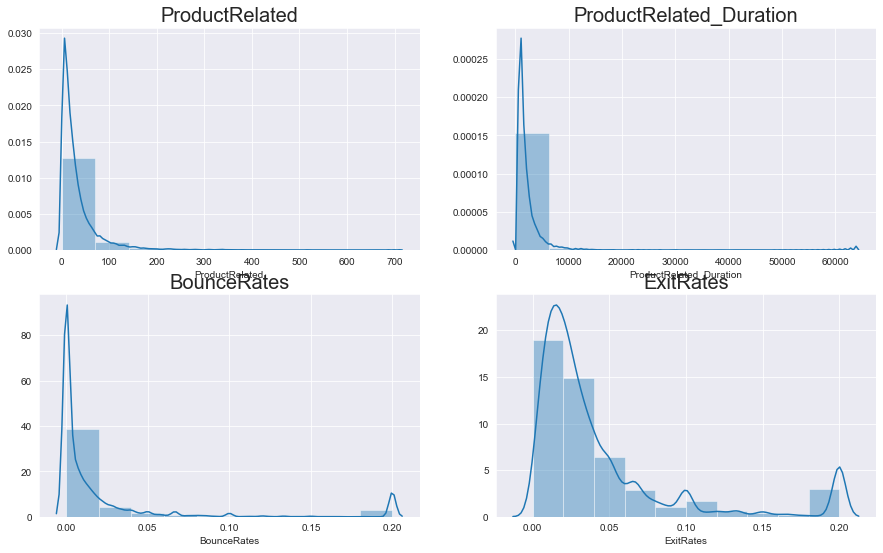

In [411]:
plt.subplot(2,2,1)
sns.distplot(data.ProductRelated,bins=10)
plt.title('ProductRelated', fontsize = 20)
plt.subplot(2,2,2)
sns.distplot(data.ProductRelated_Duration,bins=10)
plt.title('ProductRelated_Duration', fontsize = 20)
plt.subplot(2,2,3)
sns.distplot(data.BounceRates,bins=10)
plt.title('BounceRates', fontsize = 20)
plt.subplot(2,2,4)
sns.distplot(data.ExitRates,bins=10)
plt.title('ExitRates', fontsize = 20)

In [412]:
shapiro(data.ProductRelated),shapiro(data.ProductRelated_Duration),shapiro(data.BounceRates),shapiro(data.ExitRates)

((0.6104096174240112, 0.0),
 (0.5550280809402466, 0.0),
 (0.4922066330909729, 0.0),
 (0.6992335319519043, 0.0))

Similar Poor Distribution of data

### Feature Selection using Statistical methods

In [426]:
from scipy.stats import chi2_contingency,f_oneway,shapiro,kruskal

In [413]:
features=[]
for i in data.columns:
    pvalue=0
    if (data[i].dtypes==object)|(data[i].dtypes==bool):
        cross=pd.crosstab(data["Revenue"],data[i])
        pvalue=chi2_contingency(cross)[1]
        print("CHI",i,pvalue)
        if pvalue<0.05:
            features.append(i)
    else:
        T=data[i][data["Revenue"]==True]
        F=data[i][data["Revenue"]==False]
        shT=shapiro(T)[1]
        shF=shapiro(F)[1]
        if shT<0.05 or shF<0.05:
            pvalue=kruskal(T,F).pvalue
            print("KRU",i,pvalue)
            if pvalue<0.05:
                features.append(i)
        else:
            pvalue=f_oneway(T,F).pvalue
            print("ANOVA",i,pvalue)
            if pvalue<0.05:
                features.append(i)
print(features)

KRU Administrative 1.3118409860995926e-77
KRU Administrative_Duration 4.671944640125305e-74
KRU Informational 1.202706626266764e-36
KRU Informational_Duration 1.4089492366808854e-35
KRU ProductRelated 1.0523572362880605e-107
KRU ProductRelated_Duration 5.331818648910668e-128
KRU BounceRates 1.8326585049883445e-61
KRU ExitRates 1.1567097047584001e-175
KRU PageValues 0.0
KRU SpecialDay 5.079229060937998e-22
CHI Month 2.2387855164805443e-77
CHI OperatingSystems 1.4160941129614507e-13
CHI Browser 0.00608754317955108
CHI Region 0.3214249979076556
CHI TrafficType 1.652735258160153e-67
CHI VisitorType 4.269904152293867e-30
CHI Weekend 0.0012663251061221968
CHI Revenue 0.0
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


We can see here that as per our Statistical Tests all our Variables have significant impact on out target variable, Hence inorder to reduce dimentions for our linear model we will do one hot encoding and carry out RFE 

In [428]:
objectdata=data[["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]

In [429]:
objdummies=pd.get_dummies(objectdata,drop_first=True)

In [430]:
objdummies.head()

Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  OperatingSystems_8  Browser_2  Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  Browser_8  Browser_9  Browser_10  Browser_11  Browser_12  Browser_13  Region_2  Region_3  Region_4  Region_5  Region_6  Region_7  Region_8  Region_9  TrafficType_2  TrafficType_3  TrafficType_4  TrafficType_5  TrafficType_6  TrafficType_7  TrafficType_8  TrafficType_9  TrafficType_10  TrafficType_11  TrafficType_12  TrafficType_13  TrafficType_14  TrafficType_15  TrafficType_16  TrafficType_17  TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_Other  VisitorType_Returning_Visitor  Weekend_True
0          0          1          0           0          0          0          0          0          0                   0                   0                   0                   0                   0                   0                   0          0          0          0          0          0          0          0          0           0           0           0           0         0         0         0         0         0         0         0         0              0              0              0              0              0              0              0              0               0               0               0               0               0               0               0               0               0               0               0                  0                              1             0
1          0          1          0           0          0          0          0          0          0                   1                   0                   0                   0                   0                   0                   0          1          0          0          0          0          0          0          0           0           0           0           0         0         0         0         0         0         0         0         0              1              0              0              0              0              0              0              0               0               0               0               0               0               0               0               0               0               0               0                  0                              1             0
2          0          1          0           0          0          0          0          0          0                   0                   0                   1                   0                   0                   0                   0          0          0          0          0          0          0          0          0           0           0           0           0         0         0         0         0         0         0         0         1              0              1              0              0              0              0              0              0               0               0               0               0               0               0               0               0               0               0               0                  0                              1             0
3          0          1          0           0          0          0          0          0          0                   0                   1                   0                   0                   0                   0                   0          1          0          0          0          0          0          0          0           0           0           0           0         1         0         0         0         0         0         0         0              0              0              1              0              0              0              0              0               0               0               0               0               0               0               0               0               0          

In [431]:
objdummies.shape

(12330, 58)

In [450]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#### Using RFE to select 20 Best Features for our Logestic Model

In [570]:
data_DUM=pd.concat([data,objdummies],axis=1)
data_DUM=data_DUM.drop(columns=objectdata.columns)
data_DUM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 69 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Revenue                          12330 non-null bool
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar                        12330 non-null uint8
Month_May     

In [574]:
xdum=data_DUM.drop(columns="Revenue")
y=data.Revenue
modelLR=LogisticRegression()
rfecv = RFECV(estimator=modelLR, step=1, cv=StratifiedKFold(5),scoring='roc_auc')
rfecv.fit(xdum,y)# Doing RFECV to get best number of Features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 68


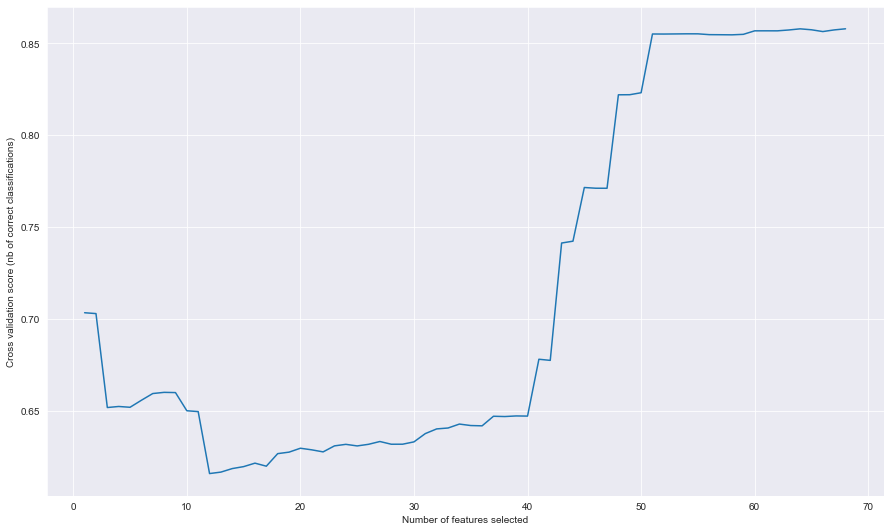

In [444]:
# Plot number of features VS.cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

From the above plot we can make out that at around 52 Features the accuracy is more or less maxed out hence we will now use RFE to select the best 52 Features

In [452]:
rfe=RFE(estimator=modelLR,n_features_to_select=52)
rfe.fit(xdum,y)
rfe.ranking_

array([ 3, 15,  1, 17, 12, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  8,  1,  1,  1, 10,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  2,
        1,  9,  1, 13,  1,  1,  1,  1,  6, 14,  7,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  5,  1,  1,  1,  1,  1,  1])

In [454]:
selected_features=[]
for i,j in zip(xdum.columns,rfe.ranking_):
    if j==1:
        selected_features.append(i)
print(selected_features)
print(len(selected_features))

['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_12', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True']
52


##### As out data is little unbalanced we will apply SMOTE and carry out RFECV again to observe changes

In [445]:
from imblearn.over_sampling import SMOTE

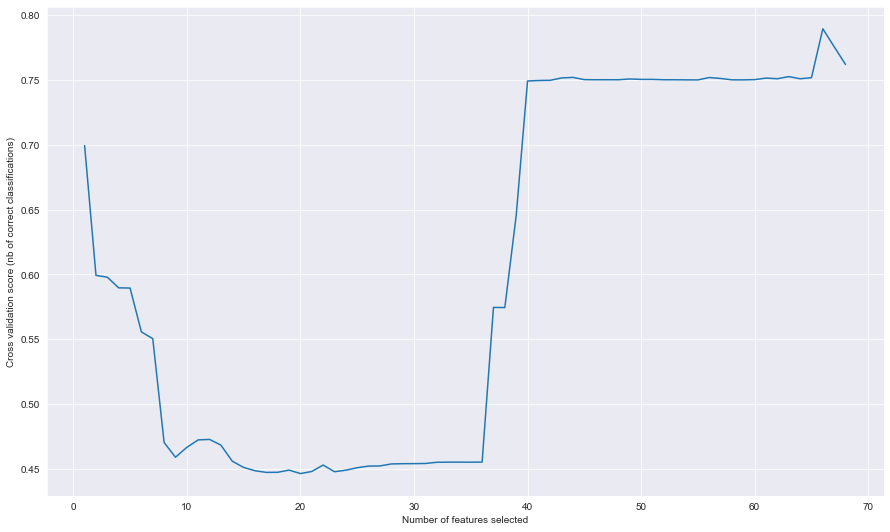

In [575]:
XDUM,Y=smt.fit_sample(xdum,y)
rfecv = RFECV(estimator=modelLR, step=1, cv=StratifiedKFold(5),scoring='roc_auc')
rfecv.fit(XDUM,Y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

As we can see above that our Linear Model is not Benefitting from Oversampling

### PCA

##### As One Hot Encoding introduces some multicollinearity we will use PCA to eliminate it

In [498]:
from sklearn.preprocessing import StandardScaler

In [576]:
sc=StandardScaler()
xdum=xdum[selected_features]
xscd=sc.fit_transform(xdum)
xscd=pd.DataFrame(xscd)
xscd.columns=xdum.columns

In [577]:
cov_matrix=xscd.cov()
cov_matrix=np.array(cov_matrix)
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp =np.cumsum(var_exp)
print(cum_var_exp)
print(len(cum_var_exp))

[  4.99582285   9.44250623  13.12841814  16.42221442  19.5144615
  22.12622394  24.60490202  27.03892198  29.44452075  31.72447596
  33.99677149  36.21439611  38.42877018  40.5709674   42.69199458
  44.76960633  46.82638389  48.85019374  50.85820516  52.85170032
  54.82624726  56.78118396  58.71947697  60.64728577  62.57145962
  64.48875067  66.39669492  68.30244522  70.19742433  72.08819449
  73.95729575  75.81555485  77.65481214  79.45483767  81.23440763
  82.98774849  84.72892637  86.44611112  88.08938223  89.68702978
  91.22653032  92.67330247  94.02131492  95.20422438  96.36544554
  97.44509016  98.40128403  99.0538574   99.46153001  99.6827448
  99.84608439 100.        ]
52


Checking cumulative sum of Eigenvalues to understand how many PCA Dimensions we can create. We will go with 48 and increase if needed

In [502]:
from sklearn.decomposition import PCA

In [579]:
pca=PCA(n_components=48)
xpcad=pca.fit_transform(xscd)
xpcad=pd.DataFrame(xpcad)

In [580]:
xpcad.shape

(12330, 48)

## Model Building and Comparisen

### Linear Models(LR,NB)

#### LR

In [496]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [531]:
modelLR=LogisticRegression(C=2)

In [ ]:
for model,name in zip([modelLR],["LR"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,xpcd,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.895162545835135 VAR: 0.0024775707031709305 LR(C=2) WITHOUT PCA

ROC_AUC: 0.8915329716433307 VAR: 0.0015717862071622248 LR (C=2) WITH PCA

Variance Error Reduced with little impact on Bias after using PCA

#### LR Model Evaluation

In [538]:
x_train,x_test,y_train,y_test=train_test_split(xpcad,y,test_size=0.20,stratify=ylr)
modelLR.fit(x_train,y_train)
y_probaLR=modelLR.predict_proba(x_test)[:,1]
y_predLR=modelLR.predict(x_test)
roc_auc_score(y_test,y_probaLR)

0.9057334113816563

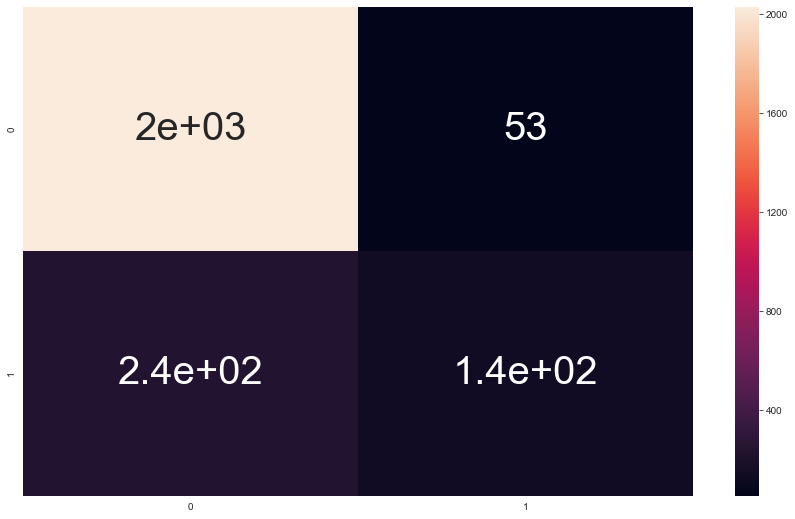

In [539]:
cm=confusion_matrix(y_test,y_predLR)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [540]:
cr=classification_report(y_test,y_predLR,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2084
        True       0.73      0.38      0.50       382

    accuracy                           0.88      2466
   macro avg       0.81      0.68      0.72      2466
weighted avg       0.87      0.88      0.87      2466



### Navies_baised

In [556]:
from sklearn.naive_bayes import GaussianNB

In [557]:
modelNB=GaussianNB()

In [558]:
for model,name in zip([modelNB],["NB"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,xpcad,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.7931795067463161 VAR: 0.010375160604577504 NB


ROC_AUC: 0.7931795067463161 VAR: 0.010375160604577504 NB

Navie Bayes Performing Poorly because of poor structure of Data

#### NB Model Evaluation

In [560]:
x_train,x_test,y_train,y_test=train_test_split(xpcad,y,test_size=0.20,stratify=ylr)
modelNB.fit(x_train,y_train)
y_probaLR=modelNB.predict_proba(x_test)[:,1]
y_predLR=modelNB.predict(x_test)
roc_auc_score(y_test,y_probaLR)

0.7947563585935223

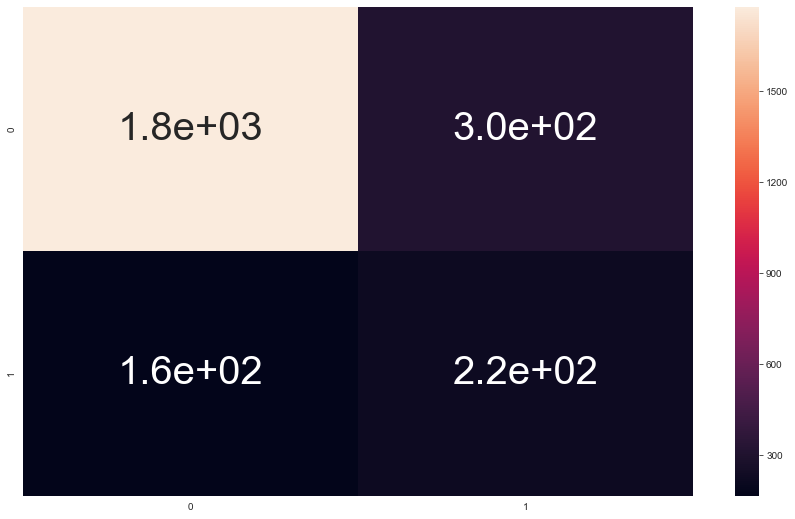

In [561]:
cm=confusion_matrix(y_test,y_predLR)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [562]:
cr=classification_report(y_test,y_predLR,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.92      0.85      0.88      2084
        True       0.42      0.57      0.48       382

    accuracy                           0.81      2466
   macro avg       0.67      0.71      0.68      2466
weighted avg       0.84      0.81      0.82      2466



### Distance Based Models (KNN)

In [563]:
from sklearn.neighbors import KNeighborsClassifier

In [615]:
modelKNN=KNeighborsClassifier(n_neighbors=3400,weights='distance')

In [616]:
for model,name in zip([modelKNN],["KNN"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,xscd,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.8536131563097629 VAR: 0.003604246058500658 KNN


ROC_AUC: 0.8536131563097629 VAR: 0.003604246058500658 KNN(n_neighbors=3400,weights='distance')

#### KNN Evaluation

In [618]:
x_train,x_test,y_train,y_test=train_test_split(xscd,y,test_size=0.20,stratify=ylr)
modelKNN.fit(x_train,y_train)
y_probaLR=modelKNN.predict_proba(x_test)[:,1]
y_predLR=modelKNN.predict(x_test)
roc_auc_score(y_test,y_probaLR)

0.8481003356412858

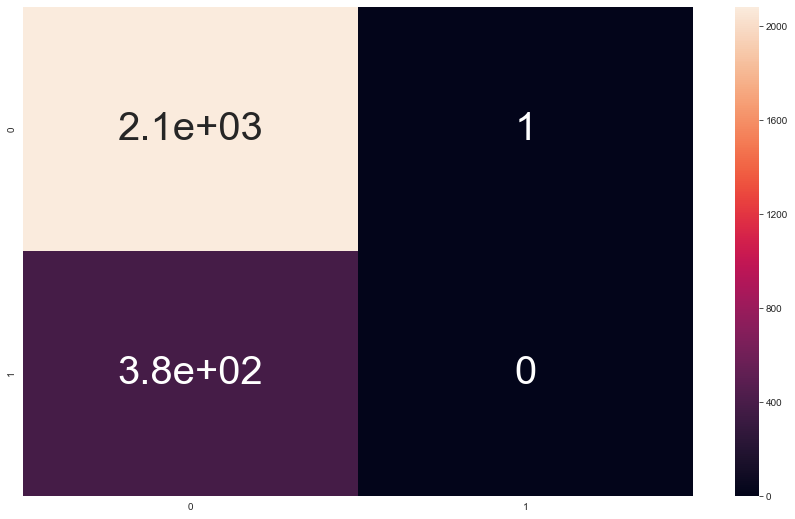

In [619]:
cm=confusion_matrix(y_test,y_predLR)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [620]:
cr=classification_report(y_test,y_predLR,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2084
        True       0.00      0.00      0.00       382

    accuracy                           0.84      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.71      0.84      0.77      2466



## Tree Based Model (DT) 

In [621]:
from sklearn.tree import DecisionTreeClassifier

In [650]:
modelDT=DecisionTreeClassifier(criterion='entropy',max_depth=9)

In [633]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [627]:
le=LabelEncoder()

In [628]:
for i in data.columns:
    if data[i].dtypes==object or data[i].dtypes==bool:
        data[i]=le.fit_transform(data[i])

In [636]:
x=data.drop(columns="Revenue")
X,Y=smt.fit_sample(x,y)# Oversampling with SMOTE

In [651]:
for model,name in zip([modelDT],["DT"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X,Y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9630493774482428 VAR: 0.0008864809773529997 DT


ROC_AUC: 0.9630493774482428 VAR: 0.0008864809773529997 DT(criterion='entropy',max_depth=9)

### DT Evaluation

In [654]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
modelDT.fit(X_train,Y_train)
y_probaDT=modelDT.predict_proba(x_test)[:,1]
y_predDT=modelDT.predict(x_test)
roc_auc_score(y_test,y_probaDT)

0.9290882415009396

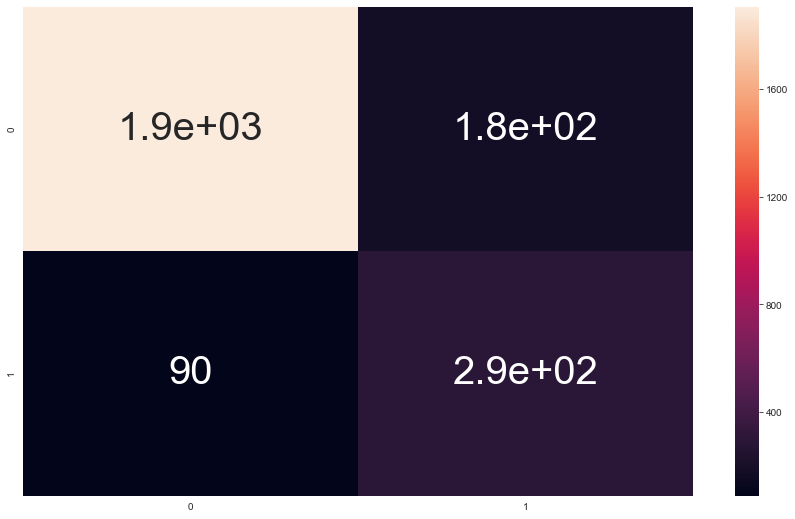

In [655]:
cm=confusion_matrix(y_test,y_predDT)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [656]:
cr=classification_report(y_test,y_predDT,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.95      0.91      0.93      2084
        True       0.62      0.76      0.68       382

    accuracy                           0.89      2466
   macro avg       0.79      0.84      0.81      2466
weighted avg       0.90      0.89      0.90      2466



## Ensemble Models(RF, GB if required) 

In [657]:
from sklearn.ensemble import RandomForestClassifier

In [659]:
modelRF=RandomForestClassifier(criterion='entropy',n_estimators=1500,n_jobs=-1)

In [660]:
for model,name in zip([modelRF],["RF"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X,Y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9879028290868741 VAR: 0.000651251303690545 RF


ROC_AUC: 0.9879028290868741 VAR: 0.000651251303690545 RF(criterion='entropy',n_estimators=1500,n_jobs=-1)

### RF Evaluation

In [661]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
modelRF.fit(X_train,Y_train)
y_probaRF=modelRF.predict_proba(x_test)[:,1]
y_predRF=modelRF.predict(x_test)
roc_auc_score(y_test,y_probaRF)

0.9949835947784667

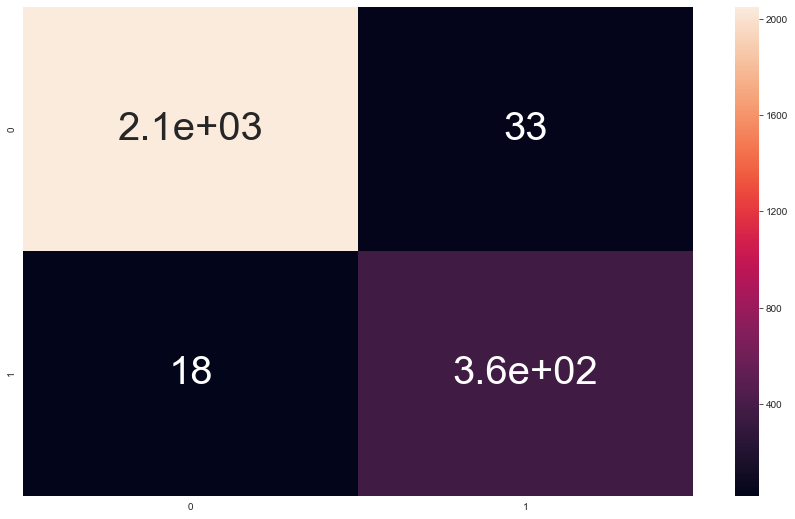

In [662]:
cm=confusion_matrix(y_test,y_predRF)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [663]:
cr=classification_report(y_test,y_predRF,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.99      0.98      0.99      2084
        True       0.92      0.95      0.93       382

    accuracy                           0.98      2466
   macro avg       0.95      0.97      0.96      2466
weighted avg       0.98      0.98      0.98      2466

